<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#График-кумулятивной-выручки-по-группам" data-toc-modified-id="График-кумулятивной-выручки-по-группам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>График кумулятивной выручки по группам</a></span></li><li><span><a href="#Анализ-аномалий" data-toc-modified-id="Анализ-аномалий-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ аномалий</a></span></li><li><span><a href="#Cтатистическая-значимость-различий" data-toc-modified-id="Cтатистическая-значимость-различий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cтатистическая значимость различий</a></span></li><li><span><a href="#Тестирование-по-«очищенным»-данным" data-toc-modified-id="Тестирование-по-«очищенным»-данным-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Тестирование по «очищенным» данным</a></span></li></ul></li></ul></div>

# Анализ гипотез по увеличению выручки интернет-магазина

In [1]:
#загрузим все необходимые для работы библиотеки

import pandas as pd
pd.set_option("max_colwidth", 150)
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt

## Приоритизация гипотез 

In [2]:
#загрузим данные о гипотезах

hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# выведем на экран гипотезы

hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# выведем полные названия гипотез

hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [5]:
hypothesis['ICE'] = round(hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts'],2)
hypothesis['ICE'].sort_values(ascending=False)



8    16.20
0    13.33
7    11.20
6     8.00
2     7.00
1     2.00
5     1.33
3     1.12
4     1.00
Name: ICE, dtype: float64

Самые перспективные для проверки гипотезы при расчете с помощью фрейморка ICE - № 8,0,7

- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [6]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['RICE'].sort_values(ascending=False)

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
Name: RICE, dtype: float64

In [7]:
# выведем получившуюся таблицу на экран

hypothesis = hypothesis.sort_values(by='RICE',ascending=False)

hypothesis.style.background_gradient(cmap='RdYlGn', subset=["ICE", "RICE"])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


Самые перспективные для проверки гипотезы при расчете с помощью фрейморка RICE - № 7,2,0,6

При расчете RICE мы использовали дополнительный критерий - Reach, который оценивает число пользователей, которых затронет изменение. У гипотезы № 8 он равен 1, поэтому в общем рейтинге она опустилась на 8 место, а вперед вышла гипотеза № 7, у которой этот показатель равен 10. 

Гипотеза № 7 предлагает добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

## Анализ A/B-теста

In [8]:
# загрузим датафреймы и присвоим им переменные

orders = pd.read_csv('/datasets/orders.csv', sep=',')

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')


In [9]:
# выведем общую информацию о датафреймах


print(orders.info())
print()
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


В датафрейме orders 1197 строк, пропусков нет.

В датафрейме visitors 62 строки, пропусков также нет.

In [10]:
# выведем первые пять строк датафреймов

print(orders.head())
print()
print(visitors.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [11]:
# проверим уникальные значения столбцов с категориальными переменными

print(orders['group'].unique())

print(visitors['group'].unique())

['B' 'A']
['A' 'B']


Неявных дубликатов нет, все значения корректные.

In [12]:
# изменим тип данных столбцов date на datetime

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
                                    
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [13]:
# изменим названия столбцов transactionId и visitorId 

orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)


In [14]:
# проверим orders на явные дубликаты

orders.duplicated().sum()

0

Явных дубликатов в датафрейме orders не выявлено.

In [15]:
# проверим visitors на явные дубликаты

visitors.duplicated().sum()

0

Явных дубликатов в датафрейме orders не выявлено.

### График кумулятивной выручки по группам


In [16]:
# cоздадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

dates_groups = orders[['date','group']].drop_duplicates() 

dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [17]:
# соберем агрегированные кумулятивные данные о заказах по дням


orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({
    'date' : 'max', 
    'group' : 'max', 
    'transaction_id' : 'nunique', 
    'visitor_id' : 'nunique', 
    'revenue' : 'sum'
    }), axis=1).sort_values(by=['date','group']) 

orders_aggregated.head()





,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [18]:
# получим агрегированные кумулятивные данные о посетителях интернет-магазина по дням

visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({
    'date' : 'max', 
    'group' : 'max', 
    'visitors' : 'sum'
    }), axis=1).sort_values(by=['date','group']) 

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [19]:
# объединим обе таблицы в одну с понятными названиями столбцов:

cumulative_data = orders_aggregated.merge(visitors_aggregated, how='left', left_on=['date', 'group'], right_on=['date','group'])
cumulative_data.rename(columns={'transaction_id': 'transactions', 'visitor_id':'buyers'}, inplace=True)



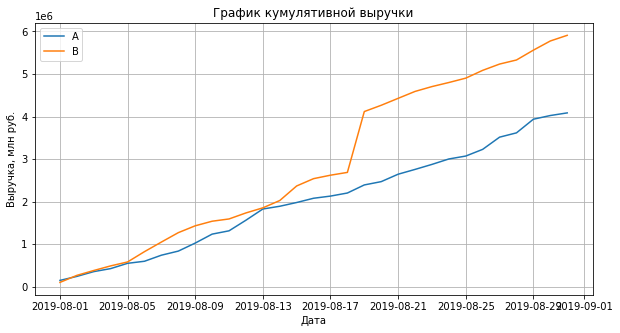

In [20]:
# посмтроим график кумулятивной выручки по дням

# сначала создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'transactions']]

# и создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'transactions']]

# теперь посмтроим сам график

plt.figure(figsize=(10,5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('График кумулятивной выручки')
plt.grid()
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Выручка, млн руб.")
plt.show()

До середины августа обе группы относительно шли вровень, затем показатель группы B резко подскочил вверх, что может свидельствовать о резком всплеске заказов или наличии аномалии.

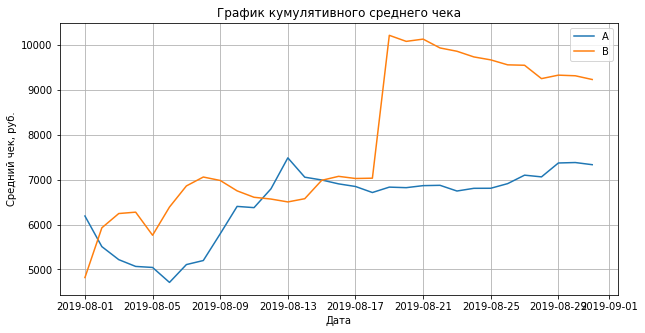

In [21]:
# построим график кумулятивного среднего чека по группам.

plt.figure(figsize=(10,5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['transactions'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['transactions'], label='B')
plt.title('График кумулятивного среднего чека')
plt.grid()
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Средний чек, руб.")
plt.show()



На графике среднего чека в начале периода группы ведут себя нестабильно. В середине августа фиксируется резкий рост среднего чека группы B. Далее кривые относительно стабилизируются. 

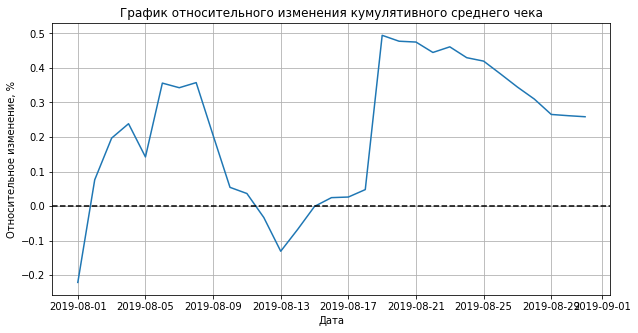

In [22]:
# построим график относительного изменения кумулятивного среднего чека группы B к группе A

merged_сumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, how='left', left_on=['date'], right_on=['date'], suffixes=['_A','_B'])

plt.figure(figsize=(10,5))
plt.plot(merged_сumulative_revenue['date'], merged_сumulative_revenue['revenue_B'] / merged_сumulative_revenue['transactions_B'] /(merged_сumulative_revenue['revenue_A'] / merged_сumulative_revenue['transactions_A'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение, %")
plt.show()

Показатель среднего чека группы B начинает резко расти в начале периода, затем в середине августа он также резко падает. В середине августа он опять начинает резко расти. В конце периода группа B показывает сильно лучшие результаты, чем группа A.  

График ведет себя нестабильно. Скорее всего, в датасете много выбросов и аномальных значений. 

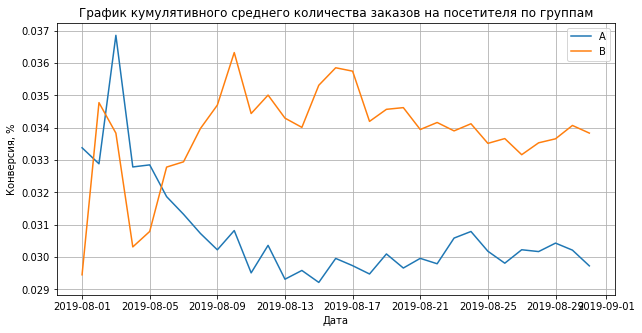

In [23]:
# построим график кумулятивного среднего количества заказов на посетителя по группам

# считаем кумулятивную конверсию - отношение количества заказов на посетителя
cumulative_data['conversion'] = cumulative_data['transactions'] / cumulative_data['visitors']


# отделяем данные по группе A

cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']


# отделяем данные по группе B

cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']


# строим графики

plt.figure(figsize=(10,5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Дата")
plt.ylabel("Конверсия, %")
plt.show()

На протяжении всего периода график сильно скачет. В конце периода конверсия группы B превосходит показатели группы A.

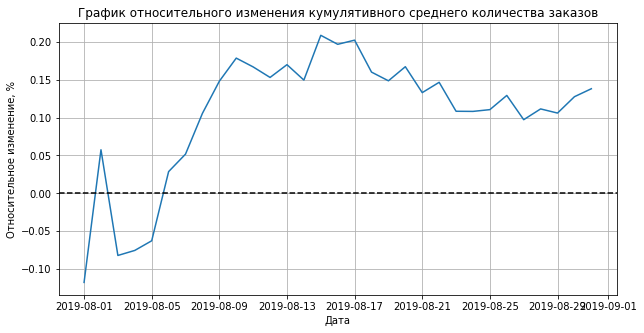

In [24]:
# построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

merge_cumulative_conversion = cumulative_data_A.merge(cumulative_data_B, how='left', left_on='date', right_on='date', suffixes=['_A', '_B'])

plt.figure(figsize=(10,5))
plt.plot(merge_cumulative_conversion['date'], merge_cumulative_conversion['conversion_B'] /  merge_cumulative_conversion['conversion_A'] - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение, %")
plt.grid()
plt.show()






Конверсия группы B показывает результат лучше группы A.

### Анализ аномалий

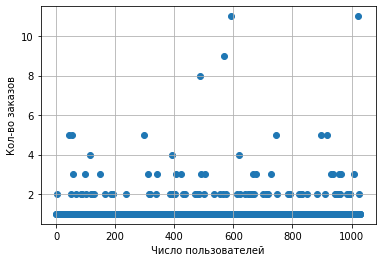

In [25]:
# построим точечный график количества заказов по пользователям


# сгруппируем данные по пользователям, посчитаем число заказов по каждому из них
orders_by_visitors = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_visitors.columns = ['visitor_id', 'transactions']

# построим диаграмму рассеяния

x_values = pd.Series(range(0,len(orders_by_visitors)))
plt.scatter(x_values, orders_by_visitors['transactions'])
plt.grid()
plt.xlabel("Число пользователей")
plt.ylabel("Кол-во заказов")
plt.show()

На графике мы видим, что в датасете есть пользователи с аномальными показателями - те из них, кто сделал 3 и больше заказов.  

In [26]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя

np.percentile(orders_by_visitors['transactions'], [95,99])


array([2., 4.])

Только 5% покупателей сделали больше двух заказов. И только 1% - больше четырех.

Для дальнейших расчетов определим границу для определения аномальных пользователей в 2 заказа.

Медианная стоимость заказа:2978.0


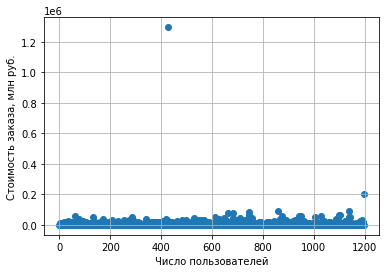

In [27]:
# построим точечный график стоимостей заказов

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

median = orders['revenue'].median()
print(f'Медианная стоимость заказа:{median}')
plt.grid()
plt.xlabel("Число пользователей")
plt.ylabel("Стоимость заказа, млн руб.")
plt.show()

На диаграмме мы видим два аномальных заказа. Стоимость первого составила более 1,2 млн рублей Второго - около 200 тыс. рублей. При этом медианный показатель стоимость заказа равняется 2,9 тыс. рублей.





In [28]:
# посчитаем 95-й и 99-й перцентили стоимости заказов

np.percentile(orders['revenue'], [95,99])



array([28000. , 58233.2])

Только 5% заказов в нашем датасете дороже 28 тыс. рублей и только 1% - дороже 58,2 тыс. рублей. Как границу для расчетов определим первое значение - 95-й процентиль, 28 тыс. рублей.

### Cтатистическая значимость различий

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — до удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Начнём с подготовки данных. 

In [29]:
# создадим датафреймы с числом заказов по пользователям для групп A и B

orders_by_visitors_a = orders[orders['group'] == 'A'].groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
orders_by_visitors_a.columns = ['visitor_id', 'transactions']

orders_by_visitors_b = orders[orders['group'] == 'B'].groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
orders_by_visitors_b.columns = ['visitor_id', 'transactions']

# создадим датафреймы с числом посетителей по дням

visitors_per_date_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_per_date_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]


In [30]:
# посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
# объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов 

sample_a = pd.concat(
    [
    orders_by_visitors_a['transactions'],
    pd.Series(
        0, index=np.arange(visitors_per_date_a['visitors'].sum() - len(orders_by_visitors_a['transactions'])), 
              name='transactions'
             )
],
    axis=0
)


sample_b = pd.concat(
    [
    orders_by_visitors_b['transactions'],
    pd.Series(
        0, index=np.arange(visitors_per_date_b['visitors'].sum() - len(orders_by_visitors_b['transactions'])), 
              name='transactions'
             )
],
    axis=0
) 

# применим тест Манна-Уитни для расчета статистической значимости 
# и выведем относительный прирост среднего числа заказов группы B


print("P-value:","{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительный прирост группы B:", "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))


P-value: 0.017
Относительный прирост группы B: 0.138


P-value равняется 0.017, что ниже порога статистической значимости в 0.05. Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B составил почти 14%.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [31]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным


print('P-value:','{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'])[1] 
)
     )



print('Относительный прирост группы B:','{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
)
     ) 




P-value: 0.729
Относительный прирост группы B: 0.259


Тест не выявил статистически значимых различий между средними чеками двух групп. Нулевую гипотезу отвергнуть не получилось. При этом относительный выигрыш группы B равен почти 26%. 

Фиксируем ошибку второго рода — ложнонегативный результат. Различия между группами есть, но тест показал p-value больше уровня значимости.

### Тестирование по «очищенным» данным

Узнаем, как аномальные пользователи повлияли на статистическую значимость теста. 
Нулевая и альтернативная гипотезы те же. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.


- Примем стоимость заказов дороже 28 тыс. рублей за аномальную - только 5% заказов в нашем датасете будут дороже, 
- примем число заказов, больше двух, за аномальное - только у 5% клиентов их число будет больше

In [32]:
# узнаем, сколько всего аномальных пользователей

visitors_with_many_orders = pd.concat(
    [
        orders_by_visitors_a[orders_by_visitors_a['transactions'] > 2]['visitor_id'],
        orders_by_visitors_b[orders_by_visitors_b['transactions'] > 2]['visitor_id'],
    ],
    axis=0,
)

visitors_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']


abnormal_visitors = (
    pd.concat([visitors_with_many_orders, visitors_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_visitors.head(5))
print()
print('Число аномальных клиентов:', abnormal_visitors.shape[0]) 


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

Число аномальных клиентов: 74


Узнаем, как аномальные показатели повлияли на результаты теста.

In [33]:
# посчитаем по очищенным данным различия в числе заказов

sample_a_filtered = pd.concat(
    [
    orders_by_visitors_a[
        np.logical_not(orders_by_visitors_a['visitor_id'].isin(abnormal_visitors))
    ]['transactions'],
    pd.Series(
        0, index=np.arange(visitors_per_date_a['visitors'].sum() - len(orders_by_visitors_a['transactions'])), 
              name='transactions'
             )
],
    axis=0
)


sample_b_filtered = pd.concat(
    [
    orders_by_visitors_b[
        np.logical_not(orders_by_visitors_b['visitor_id'].isin(abnormal_visitors))
    ]['transactions'],
    pd.Series(
        0, index=np.arange(visitors_per_date_b['visitors'].sum() - len(orders_by_visitors_b['transactions'])), 
              name='transactions'
             )
],
    axis=0
) 

# применим тест Манна-Уитни для расчета статистической значимости 
# и выведем относительный прирост среднего числа заказов группы B


print("P-value:","{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

print("Относительный прирост группы B:", "{0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

P-value: 0.013
Относительный прирост группы B: 0.173


По результатам теста по очищенным данным мы видим наличие статистически значимой разницы между двумя группами. P-value ниже 0,05 - нулевую гипотезу о равенстве двух групп отвергаем. 

По приросту числа заказов на посетителя группа B теперь показывает лучшие результаты - относительно группы A она приросла на 17%.
***

Теперь по "очищенным данным" проверим статистическую значимость различий в среднем чеке между сегментами.

 - Нулевая гипотеза: различий в среднем чеке между группами нет. 
 - Альтернативная гипотеза: различия в среднем чеке между группами есть.


In [34]:
# посчитаем статистическую значимость различий в среднем чеке по «очищенным» данным

  
print('P-value:','{0:.3f}'.format( 
   stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A', 
            np.logical_not(orders['visitor_id'].isin(abnormal_visitors))
        )
        ]['revenue'], 
        orders[np.logical_and(orders['group'] == 'B',
                             np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))
             ]['revenue'], alternative="two-sided")[1]
) 
     )
       
print('Относительный прирост группы B:','{0:.3f}'.format(   
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))
          ]['revenue'].mean()
    /orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))
           ]['revenue'].mean()-1)
) 


P-value: 0.738
Относительный прирост группы B: -0.020


Тест по чистым данным не выявил статистической разницы различий в среднем чеке между группой A и группой B. Нулевую гипотезу не отвергаем. При этом относительный проигрыш среднего чека группы B составил 2%.  

**Повторим выводы из предыдущих этапов:**


**График кумулятивной выручки** 

- До середины августа обе группы относительно шли вровень, затем показатель группы B резко подскочил вверх, что может свидельствовать о резком всплеске заказов или наличии аномалии.

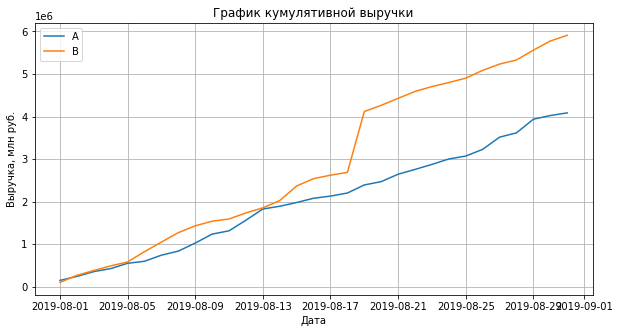

**График среднего чека**

- На графике среднего чека в начале периода группы ведут себя нестабильно. В середине августа фиксируется резкий рост среднего чека группы B. Далее кривые стабилизируются.

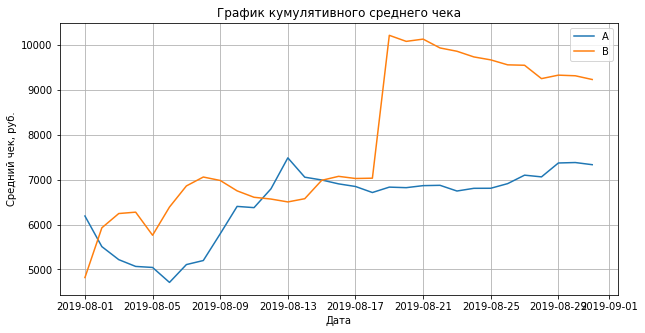

**График относительного изменения чека** 

- Показатель среднего чека группы B начинает резко расти в начале периода, затем в середине августа резко падает. В середине августа он опять начинает резко расти. В конце периода группа B показывает сильно лучшие результаты, чем группа A.
График ведет себя нестабильно. Скорее всего, в датасете много выбросов и аномальных значений.

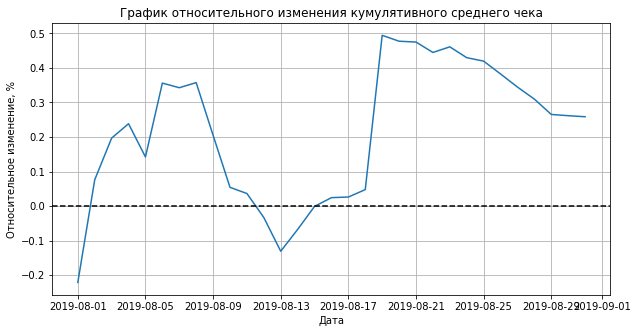

**График числа заказов на посетителя по группам**

- На протяжении всего периода график сильно скачет. В конце периода конверсия группы B превосходит показатели группы A.

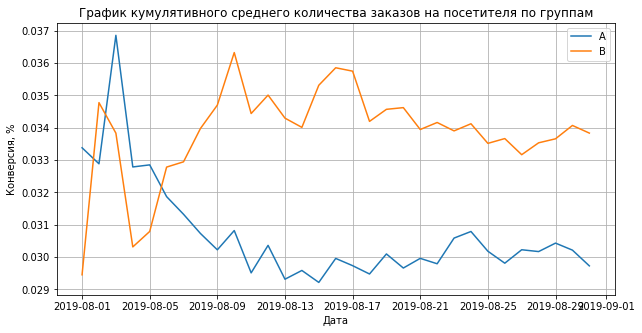

**График относительного изменения числа заказов на посетителя**

- Конверсия группы B показывает результат лучше группы A, однако график нестабилен.
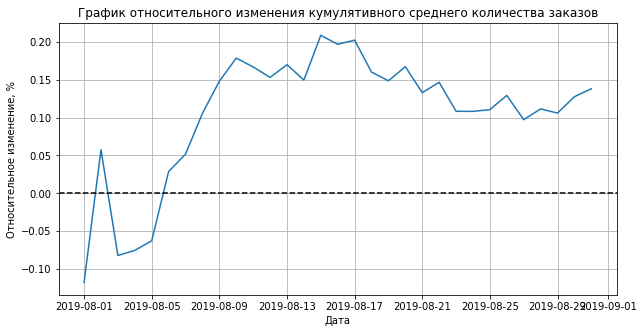


**Тест числа заказов по грязным данным**

- P-value равняется 0.017, что ниже порога статистической значимости в 0.05. Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B составил почти 14%.


**Тест числа заказов по чистым данным**
- По результатам теста по очищенным данным мы видим наличие статистически значимой разницы между двумя группами. P-value ниже 0,05 - нулевую гипотезу о равенстве двух групп отвергаем.
По приросту числа заказов группа B показывает лучшие результаты - относительно группы A она приросла на 17%



**Тест среднего чека по грязным данным**

- Тест не выявил статистически значимых различий по средним чекам двух групп. При этом относительный выигрыш группы B равен почти 25%.


**Тест среднего чека по чистым данным**

- Тест по чистым данным не выявил статистической разницы различий по среднему чеку между группой A и группой B. При этом относительный проигрыш среднего чека группы B составил 2%.



**Выводы из A\B теста**:

- Тест зафиксировал рост числа заказов на посетителя у группы B относительно группы A по чистым данным. При этом у групп есть необходимая статистическая разница. Относительный прирост группы B составил 17%. Признаем результат теста успешным.


- Анализируя средней чек, мы не выявили значимых статистических различий ни по грязным данным, ни по чистым данным. Чтобы получить релевантный результат по этим метрикам, нужно собрать больше данных, тест необходимо продолжить.